In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter

In [2]:
df = pd.read_csv("C:\PyProjects\data\Stack Overflow Annual Developer Survey-2019/survey_results_public.csv", index_col="Respondent", usecols=["Respondent","MainBranch", "SocialMedia"]).dropna(how="all")
df["MainBranch"] = df["MainBranch"].astype("category")
df["data"] = df["SocialMedia"].str.split(";")
df.head()

,MainBranch,SocialMedia,data
Respondent,,,
1,I am a student who is learning to code,Twitter,[Twitter]
2,I am a student who is learning to code,Instagram,[Instagram]
3,"I am not primarily a developer, but I write co...",Reddit,[Reddit]
4,I am a developer by profession,Reddit,[Reddit]
5,I am a developer by profession,Facebook,[Facebook]


In [3]:
data_counter = Counter()
for row in df["SocialMedia"].dropna():
    data_counter.update(row.split(';'))

data_index = []
data_values = []
for item in data_counter.most_common(15):
    data_index.append(item[0])
    data_values.append(item[1])

sum(data_counter.values())

84437

In [4]:
data_counter_pro = Counter()

for row in df.groupby("MainBranch").get_group("I am a developer by profession")["SocialMedia"].dropna():
    data_counter_pro.update(row.split(';'))

data_index_pro = []
data_values_pro = []

for item in data_counter_pro.most_common(15):
    data_index_pro.append(item[0])
    data_values_pro.append(item[1])

sum(data_counter_pro.values())

62793

<h1 style='color:red'>FUNCTIONS</h1>

In [5]:
def insert_data_labels(bars, data, position):
    for bar in bars:
        bar_width = bar.get_width()
        percent = f"({bar_width:,} - {bar_width*100/sum(data):1.1f}%)" 

        # ax.annotate('{0:.0f}'.format(bar_width),
        # ax.annotate("{:,}".format(bar_width),
        ax.annotate(percent,
            xy=(bar_width+position, bar.get_y() + bar.get_height() / 2),
            textcoords='data',
            ha='center', va='center')

def bar_color(data, limit):
    colors = []
    for i in data:
        if i > limit:
            colors.append('red')
        else:
            colors.append('gray')
    return colors

<h1 style='color:red'>GRAPH-1</h1>

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0

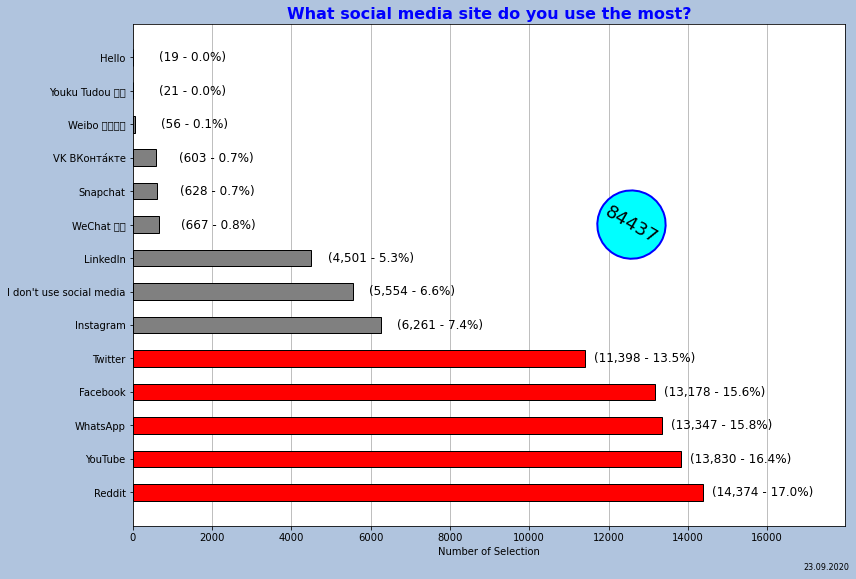

In [6]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8), facecolor='lightsteelblue')
plt.figtext(0.99, 0, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')
######################
colors = bar_color(data_values, 10000) #------function
# cmap_red = plt.get_cmap('Reds')
# colors = cmap_red(np.linspace(0.8, 0.2, len(data_index)))
bar_width = 0.50
bar_a = ax.barh(data_index, data_values, bar_width, color=colors, zorder=3)
insert_data_labels(bar_a, data_counter.values(), 1500) #------function
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(0.7, 0.6, sum(data_counter.values()), ha="center", va="center", rotation=-30, size=18, transform=ax.transAxes,
            bbox=bbox_props)
#---------------------------------------------------------------#
ax.grid(axis='x', zorder=0)
ax.set_xlim([0, max(list(data_counter.values()))*1.25])
ax.set_ylim([-1, len(data_index)])
######################
plt.title("What social media site do you use the most?", fontsize=16, color='b', weight='bold')
plt.xlabel("Number of Selection")
plt.tight_layout()
plt.show()

<h1 style='color:red'>GRAPH-2</h1>

C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20449 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 28010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\USER\AppData\Local\Programs\Python\Python38\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21338 missing from current font.
  font.set_text(s, 0.0

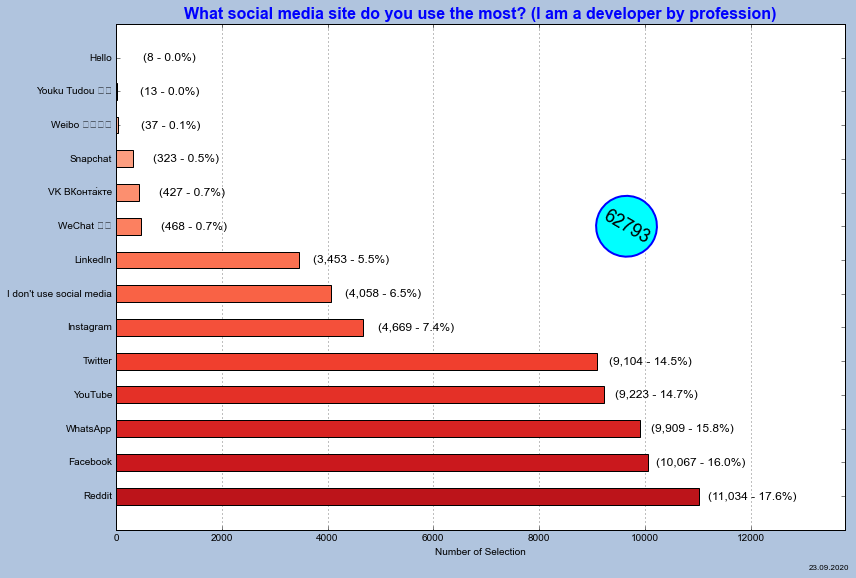

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8), facecolor='lightsteelblue')
plt.figtext(0.99, 0, "23.09.2020", horizontalalignment='right', size=8, weight='light')
matplotlib.style.use('classic')

######################
# colors_pro = bar_color(data_values_pro, 30000) #------function
cmap_red = plt.get_cmap('Reds')
colors_pro = cmap_red(np.linspace(0.8, 0.2, len(data_index)))
bar_width_pro = 0.50
bar_a_pro = ax.barh(data_index_pro, data_values_pro, bar_width_pro, color=colors_pro, zorder=3)
insert_data_labels(bar_a_pro, data_counter_pro.values(), 1000) #------function
# Circle
bbox_props = dict(boxstyle="circle,pad=0.3", fc="cyan", ec="b", lw=2)
ax.text(0.7, 0.6, sum(data_counter_pro.values()), ha="center", va="center", rotation=-30, size=18, transform=ax.transAxes,
            bbox=bbox_props)

matplotlib.rc('font', **{'sans-serif' : 'Arial',
                         'family' : 'sans-serif'})
#---------------------------------------------------------------#
ax.grid(axis='x', zorder=0)
ax.set_xlim([0, max(list(data_counter_pro.values()))*1.25])
ax.set_ylim([-1, len(data_index_pro)])
######################
plt.title("What social media site do you use the most? (I am a developer by profession)", fontsize=16, color='b', weight='bold')
plt.xlabel("Number of Selection")
plt.tight_layout()
plt.show()